# Import Libraries

In [1]:
#import necessary libraries for exploratory data analysis

import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization

import pandas as pd #data manipulation and analysis
import numpy as np  #linear algebra

# import libraries for preprocessing and clustering
import sklearn.preprocessing as skp
import sklearn.cluster as skc

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans


from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics


#ignore warnings
import warnings
warnings.filterwarnings('ignore')  


# Load the data file

In [2]:
#import csv file 
df = pd.read_csv('customer_segmentation.csv')

In [3]:
# display first 5 rows of the dataset
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

# 1. Explaratory data Analysis

## Basic Information about the data sets’ columns, data types, and non-null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Missing Values

In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### This dataset contains 24 missing values in Income field

## Dimensions of the Dataset

In [6]:
df.shape

(2240, 29)

## Find duplicate values in the Dataset

In [7]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [8]:
df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]

### There are no duplicate values in the dataset

## Basic Statistics of the numerical columns in the dataset

In [9]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

<ul>
    <li>There is some discrepancy in the data</li>
    <li>Max age is 131 </li>
     <li>There seems to be some outliers in Age and Income</li>
   
 </ul>

### Exploring the categorical data

In [10]:
print("Total categories in the feature Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", df["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


# Feature Engineering

## Handling Missing values

In [11]:
# Drop the missing rows and display the new count of the dataset
df= df.dropna()
len(df)

2216

## Data Cleaning

In [12]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format='mixed')
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  

## Feature Creation

Convert Customer_DT to a date field from string

<ul>
    <li>Create 'Age' from Year_Birth</li>
    <li>Longevity of the customer with the store</li>
    <li>Calculate 'Spendings' on different products</li>
    <li>'Living_status' on Martial_Status as 'Couple' or 'Single'</li>
    <li>'Children' Count of Children from kidhome and Teenhome</li>
    <li>'Family_size' Total family members </li>
    <li>'Is_Parent' based on 'Children'</li>
    <li>'Education' group into 3 categories </li>
</ul>

In [13]:
# add new column age to the dataset and calculate the age based on column name year_bith with the current year
def calculate_age(year_birth):
    return 2024 - year_birth

df['Age'] = df['Year_Birth'].apply(calculate_age)

#Created a feature "Longevity"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df["longevity"] = days
df["longevity"] = pd.to_numeric(df["longevity"], errors="coerce")

#Calculate 'Spendings' on different products
df["Spendings"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

#Calculate 'Purchases'
df['Purchases']= df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

#Living_status 

# Define the mapping dictionary
status_mapping = {"Married": 2, "Together": 2, "Absurd": 1,"Alone": 1, 
                  "Widow": 1, "YOLO": 1, "Divorced": 1, "Single": 1}

# Replace values using map
df["Living_status"] = df["Marital_Status"].map(status_mapping)
#  convert it to int
df["Living_status"] = df["Living_status"].astype(int)
#Feature indicating total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]
#Feature for total members in the householde
df["Family_Size"] = df["Living_status"]+ df["Children"]

#Feature pertaining parenthood
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

#Segmenting education levels in three groups
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#Products
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
# purchase
df = df.rename(columns={"NumWebPurchases": "Web","NumDealsPurchases":"Deals","NumCatalogPurchases":"Catalog","NumStorePurchases":"Store","NumWebVisitsMonth":"WebVisit"})

#Campaigns
df = df.rename(columns={"AcceptedCmp1": "Cmp1","AcceptedCmp2":"Cmp2","AcceptedCmp3":"Cmp3","AcceptedCmp4":"Cmp4","AcceptedCmp5":"Cmp5" })




## Feature Reduction

In [14]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer","Year_Birth", "ID", 
            "Z_CostContact", "Z_Revenue",
          ]
df = df.drop(to_drop, axis=1)

### Outlier Detection and Treatment

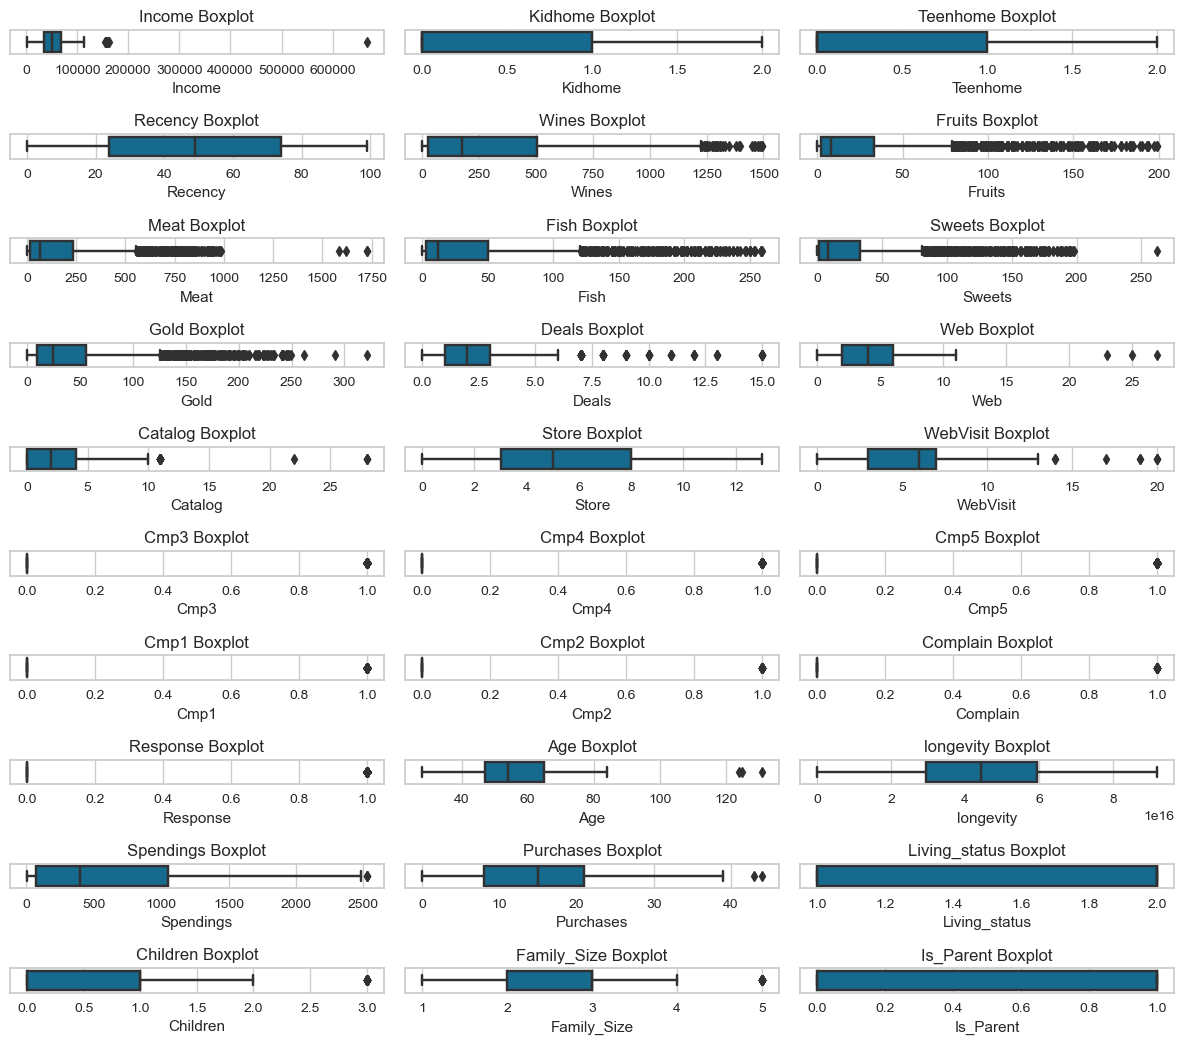

In [15]:
# Visualize the boxplot of each variable.
plt.figure(figsize=(12,30))
#Plotting following features
for i, j in enumerate(df.describe().columns):
    plt.subplot(29,3, i+1)
    sns.boxplot(x=df[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()
    
plt.show()

# Remove outliers

In [16]:
#Dropping the outliers by setting a cap on Age and income. 
df = df[(df["Age"]<90)]
df = df[(df["Income"]<650000)]
print("The total number of data-points after removing the outliers are:", len(df))


The total number of data-points after removing the outliers are: 2212


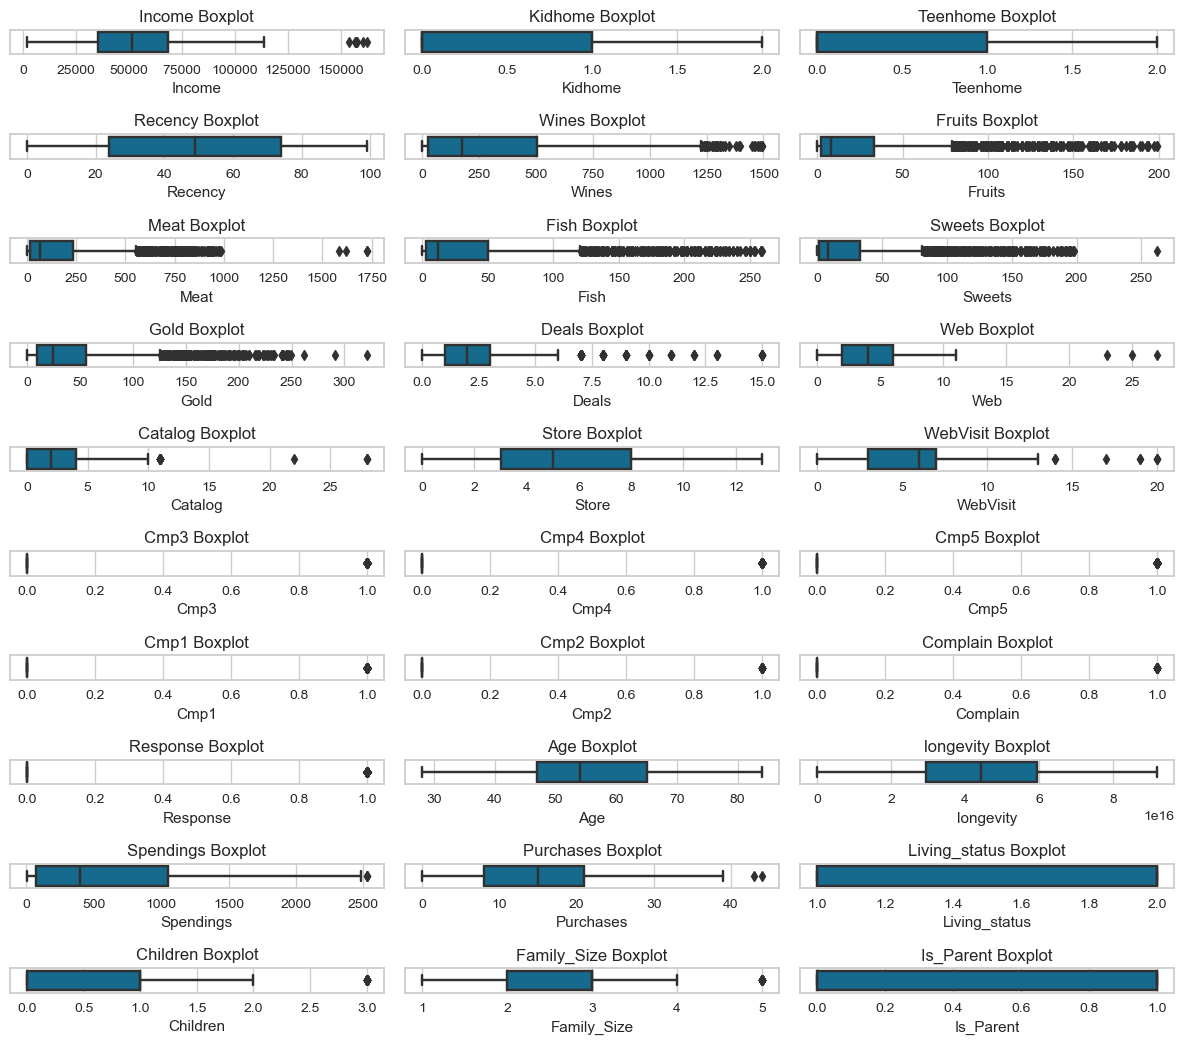

In [17]:
#Box plot after removing outliers
# Visualize the boxplot of each variable.
plt.figure(figsize=(12,30))
#Plotting following features
for i, j in enumerate(df.describe().columns):
    plt.subplot(29,3, i+1)
    sns.boxplot(x=df[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()
    
plt.show()

# Data Visualization

# Univariate analysis
#### The univariate analysis aims to understand how the values for a single variable are distributed

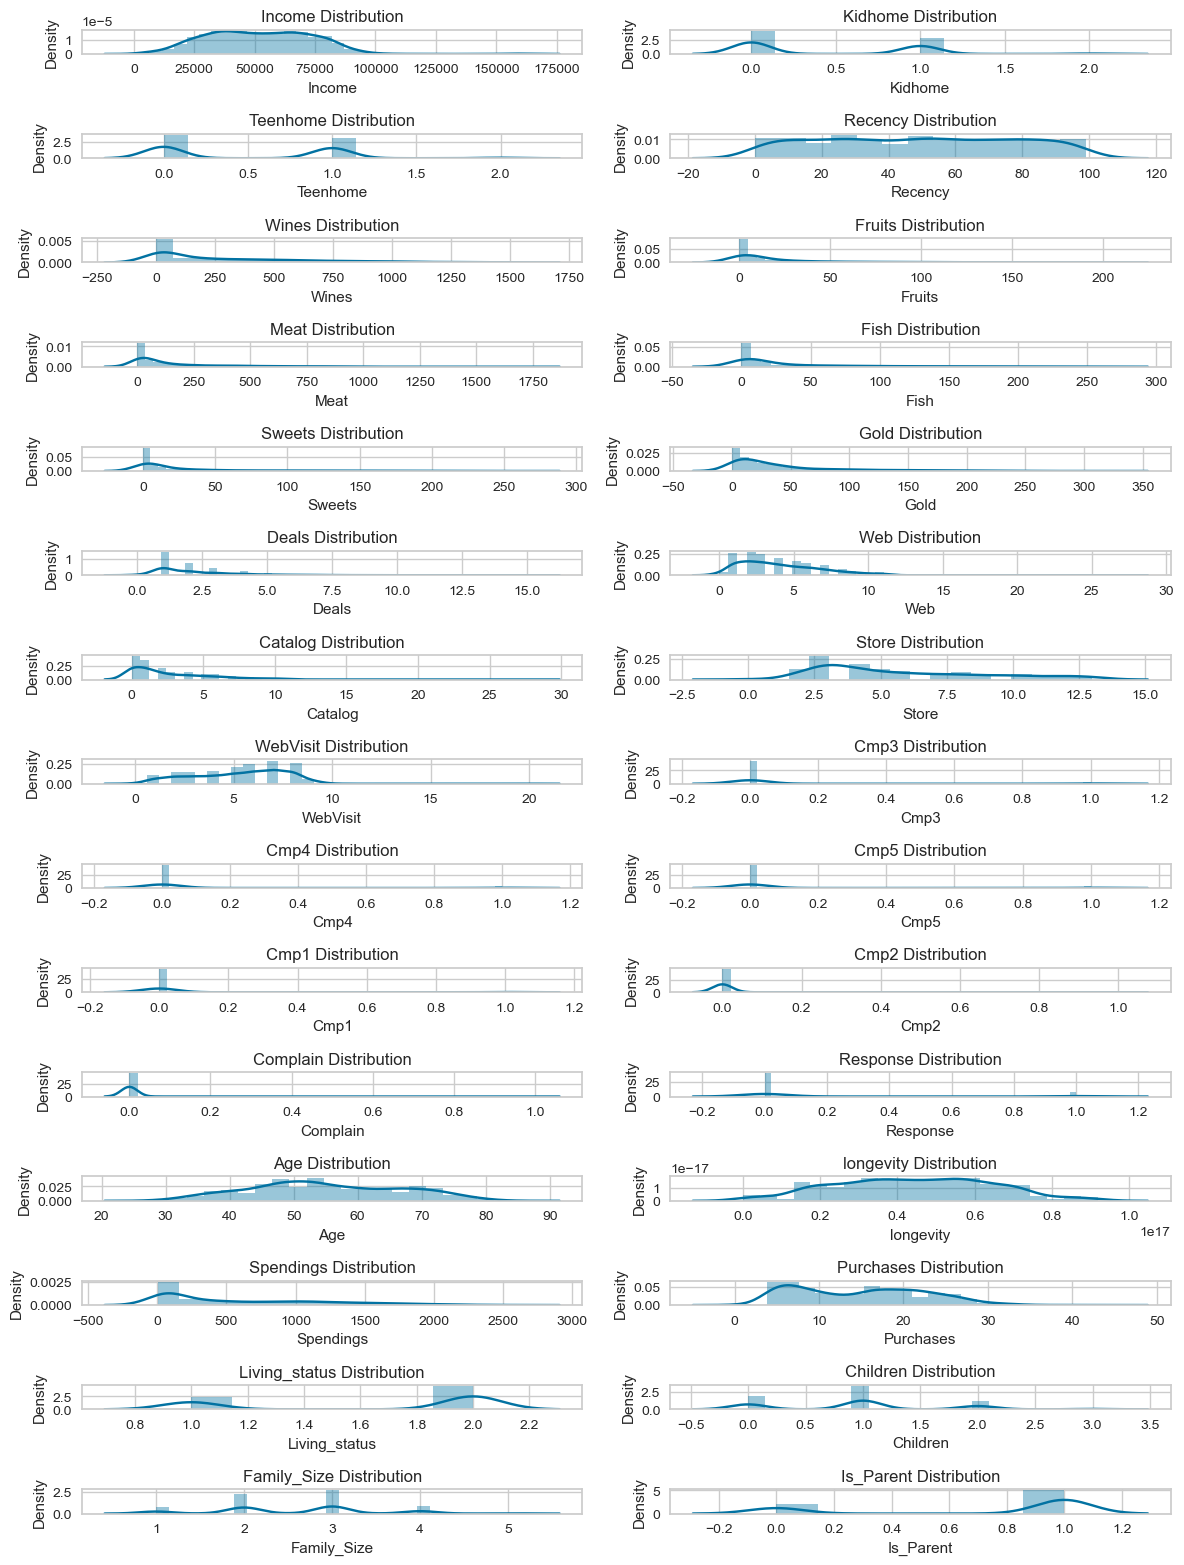

In [18]:
# Visualize the distribution of each variable.
plt.figure(figsize=(12,30))
for i, j in enumerate(df.describe().columns):
    plt.subplot(29,2, i+1)
    sns.distplot(x=df[j])
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    #plt.subplots_adjust(wspace=10, hspace=10)
    plt.tight_layout()
plt.show()

# Multivariate Analysis

In [21]:
pairplot = sns.pairplot(df, corner=True)
plt.show(pairplot)

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines', 'Fruits', 'Meat',
       'Fish', 'Sweets', 'Gold', 'Deals', 'Web', 'Catalog', 'Store',
       'WebVisit', 'Cmp3', 'Cmp4', 'Cmp5', 'Cmp1', 'Cmp2', 'Complain',
       'Response', 'Age', 'longevity', 'Spendings', 'Purchases',
       'Living_status', 'Children', 'Family_Size', 'Is_Parent'],
      dtype='object')


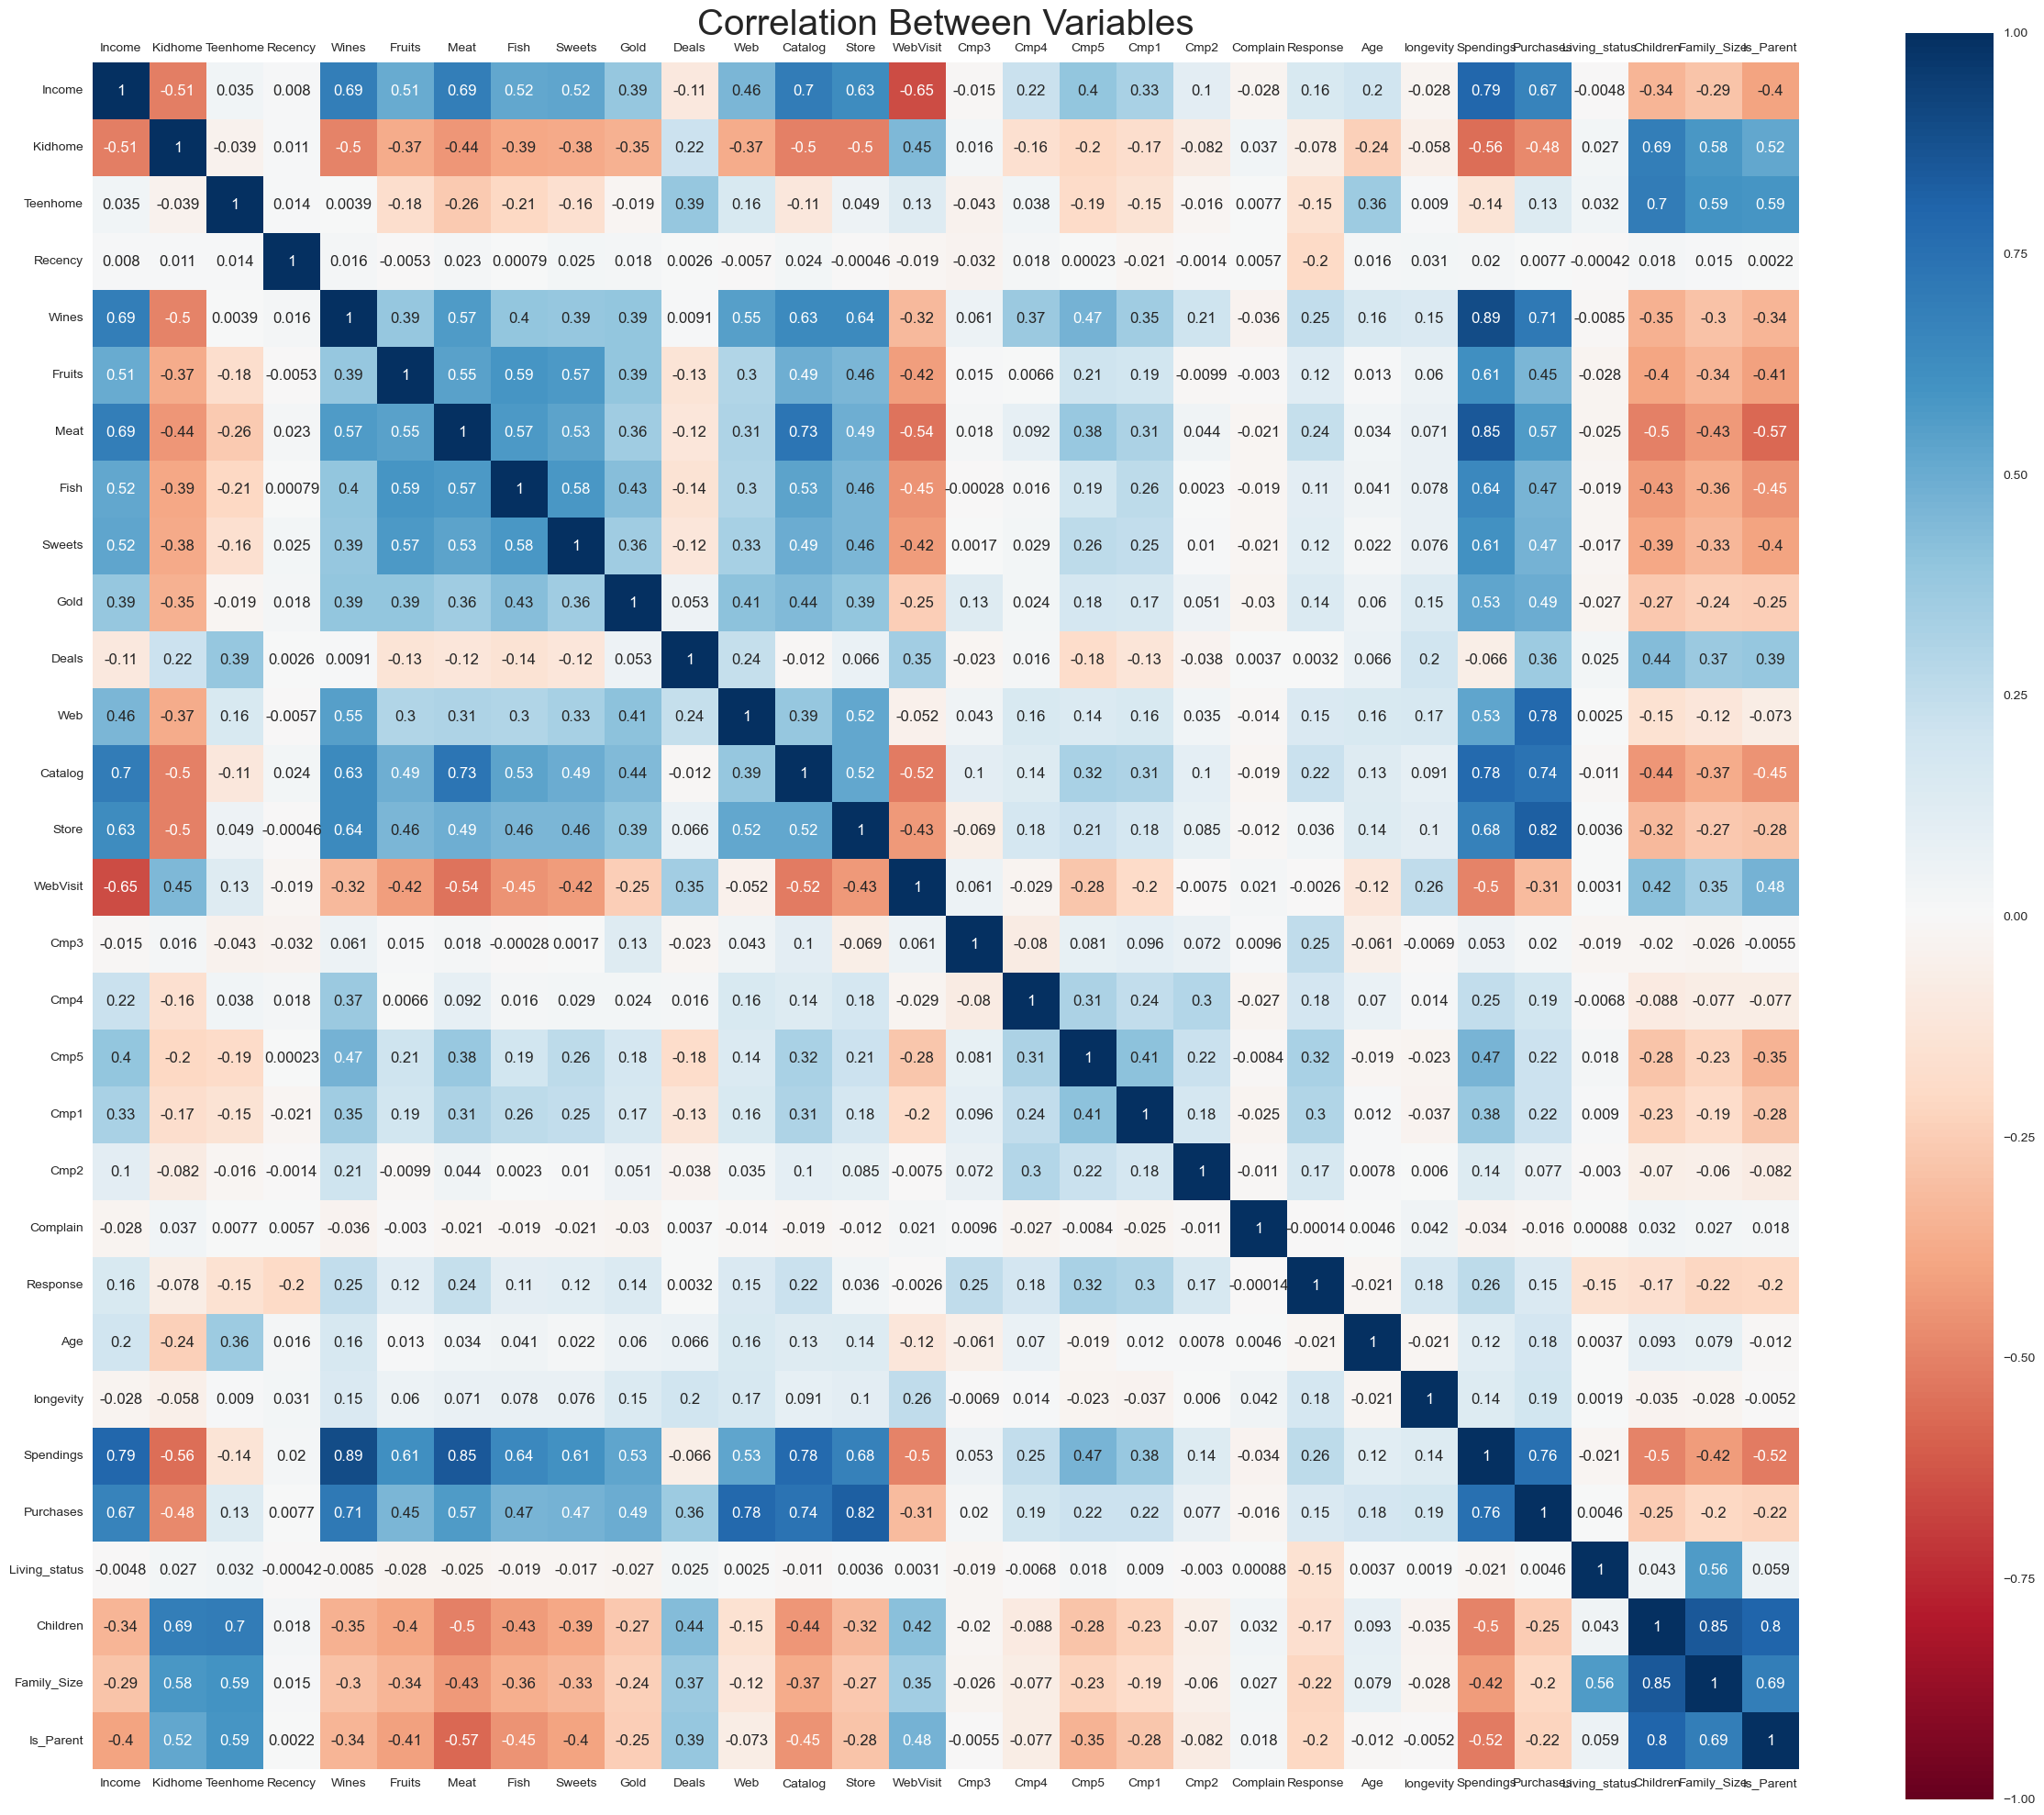

In [22]:
numeric_cols=df.select_dtypes([np.number]).columns
cols = df.select_dtypes(include=np.number)
print(numeric_cols)
correlation_metrics=cols.corr()
fig = plt.figure(figsize=(30,25))
sns.heatmap(correlation_metrics,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
plt.title('Correlation Between Variables', size=29)
plt.tick_params(axis='x', labelrotation=0, labeltop=True, labelbottom=True)
plt.show()

In [23]:
#Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education']


In [24]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [26]:
#Creating a copy of data
ds = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['Cmp3', 'Cmp4', 'Cmp5', 'Cmp1','Cmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


## Dimensionality reduction using PCA

In [27]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0  1.541865e-16  2.973109 -5.610197 -2.709494 -0.712602  2.617960   
col2  2212.0  1.284887e-17  1.793087 -4.327350 -1.388719 -0.239711  1.319659   
col3  2212.0 -5.621382e-18  1.235391 -3.673378 -0.853517 -0.018700  0.833428   

           max  
col1  7.589652  
col2  6.323468  
col3  6.808837

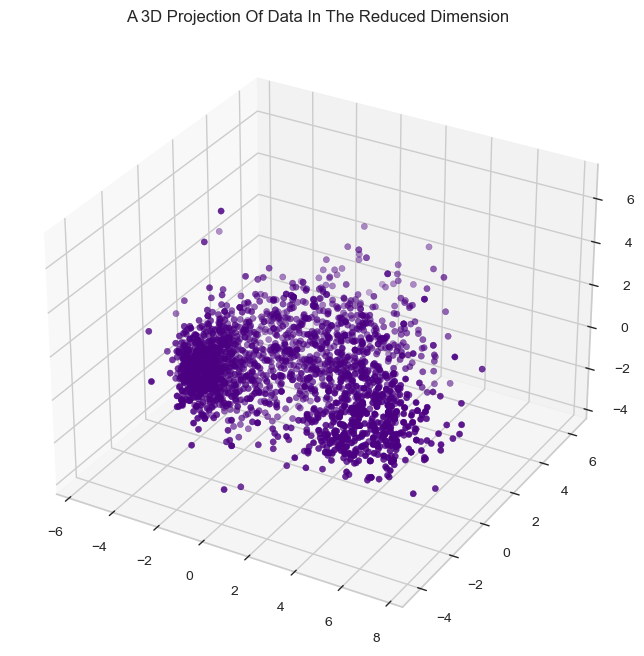

In [28]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="indigo", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## Clustering

### Elbow Method to find K

Elbow Method to determine the number of clusters to be formed:


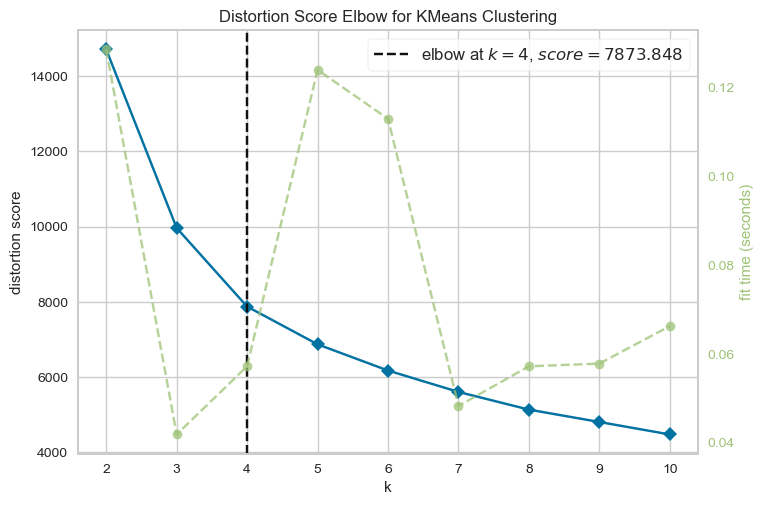

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

#### Elbow method indicates that 4 will be an optimal number of clusters for this data.  Elbow method tries to measure the homogeneity or heterogeneity within the cluster and for various values of ‘K’ and helps in arriving at the optimal ‘K’. From the above graph, we can see the homogeneity will increase or heterogeneity will decrease with increasing ‘K’ as the number of data points inside each cluster reduces with this increase. But these iterations take significant computation effort, and after a certain point, the increase in homogeneity benefit is no longer in accordance with the investment required to achieve it, as is evident from the figure. This point is known as the elbow point, and the ‘K’ value of 4 at this point produces the optimal clustering performance. 

## 4. Model Fitting

In [30]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

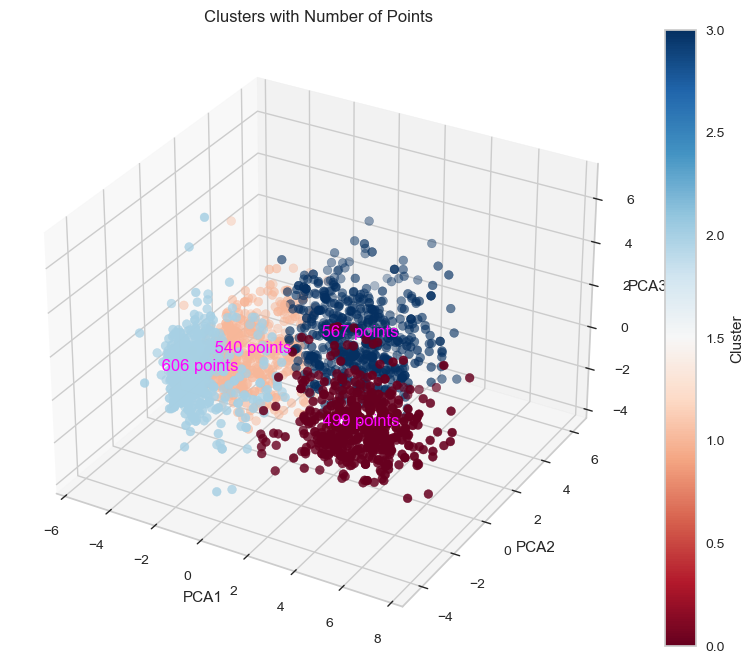

Number of points in each cluster:
0    499
1    540
2    606
3    567
Name: count, dtype: int64


In [31]:
X=PCA_ds

# Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Apply PCA for visualization (assuming 3 components for 3D plot)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create DataFrame with PCA results and cluster labels
PCA_ds = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'])
PCA_ds['Clusters'] = cluster_labels

# Plotting the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for clusters
sc = ax.scatter(PCA_ds['PCA1'], PCA_ds['PCA2'], PCA_ds['PCA3'], s=40, c=PCA_ds["Clusters"], marker='o', cmap='RdBu')

# Adding labels for the number of data points in each cluster
for i in range(4):
    ax.text(PCA_ds[PCA_ds['Clusters'] == i]['PCA1'].mean(),
            PCA_ds[PCA_ds['Clusters'] == i]['PCA2'].mean(),
            PCA_ds[PCA_ds['Clusters'] == i]['PCA3'].mean(),
            f' {cluster_labels.tolist().count(i)} points',
            fontsize=12, ha='center',color='magenta')

# Set labels and title
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('Clusters with Number of Points')

# Add color bar
cb = fig.colorbar(sc, ax=ax)
cb.set_label('Cluster')

plt.show()

# Get the cluster labels and the number of points in each cluster
cluster_labels = kmeans.labels_
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()

print("Number of points in each cluster:")
print(cluster_counts)

## 5. Post training analysis

### Distribution of Clusters

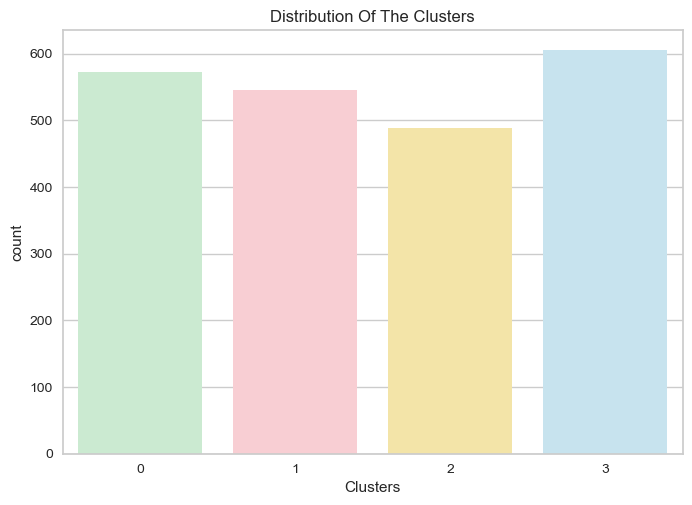

In [32]:
#Plotting countplot of clusters
palLight = ["#C6EFCE","#FFC7CE", "#FFEB9C","#C0E6F5"]
pl = sns.countplot(x=df['Clusters'], palette= palLight)
# Adding count to be displayed on each bar
pl.set_title("Distribution Of The Clusters")
plt.show()

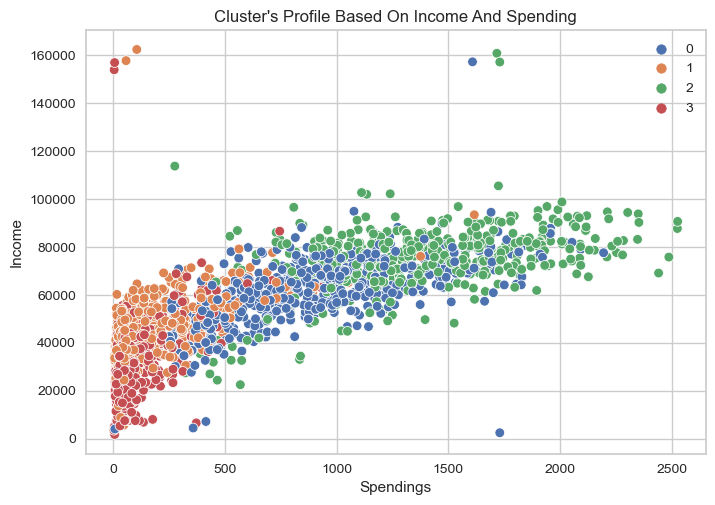

In [33]:
 pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.scatterplot(data = df,x=df["Spendings"], y=df["Income"],hue=df["Clusters"], palette= 'deep')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

<h3>Income vs  spending plot shows the clusters pattern</h3>
<dl>
  <dt>group 0</dt>
  <dd>high spending & average income</dd>
  
  <dt>group 1</dt>
  <dd>average spending & low income</dd>
  
  <dt>group 2</dt>
  <dd>high spending & high income </dd>
    
  <dt>group 3</dt>
  <dd>low spending & low income </dd>
</dl>

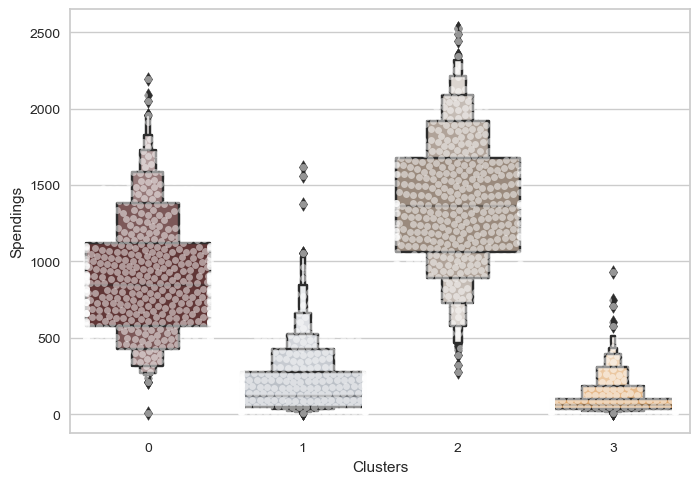

In [34]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Spendings"], color= "white", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Spendings"], palette=pal)
plt.show()

### From the above plot, it can be clearly seen that cluster 2 is our biggest set of customers closely followed by cluster 0. 

## Performance of Campaigns 

In [35]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"], palette= 'muted')
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Accepted Promotions")
plt.show()

KeyError: 'AcceptedCmp1'

### Campaign 0 has comparitively participation by all clusters. There has not been an overwhelming response to the campaigns so far. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.

## Performance of Deals

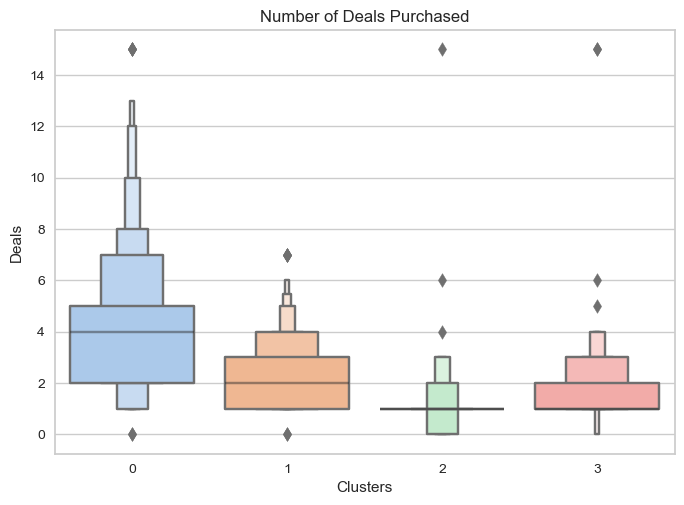

In [37]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["Deals"],x=df["Clusters"], palette= 'pastel')
pl.set_title("Number of Deals Purchased")
plt.show()

### Cluster 0 and Cluster 1 have used deals well. Cluster 2 did not participate in the deals. Deals did not much attract Cluster 3 .